In [1]:
import pandas as pd
import seaborn as sns
from seaborn import displot
import matplotlib.pyplot as plt
import missingno as msno
import warnings
import numpy as np
import plotly.express as px
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('whitegrid')
import base64
import requests as rq
import json
from datetime import date


# Arbol de Decision
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from collections import Counter

# Matriz de Confusion
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Regresion Logistica
from sklearn.linear_model import LogisticRegression

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('idealista_zaragoza_2024-09-06.csv')


In [3]:
df

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,priceInfo,propertyType,operation,size,...,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,highlight,topNewDevelopment,topPlus,parkingSpace,newDevelopmentFinished
0,105157805,https://img4.idealista.com/blur/WEB_LISTING/0/...,CATOLICO 250,67,7,250000.0,"{'price': {'amount': 250000.0, 'currencySuffix...",flat,sale,113.0,...,"{'subtitle': 'Universidad San Francisco, Zarag...",True,True,False,True,{'groupDescription': 'Top'},False,False,NaN,NaN
1,105832061,https://img4.idealista.com/blur/WEB_LISTING/0/...,CLA195,35,3,195000.0,"{'price': {'amount': 195000.0, 'currencySuffix...",flat,sale,65.0,...,"{'subtitle': 'Universidad San Francisco, Zarag...",True,True,False,False,{'groupDescription': 'Top'},False,False,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN
2,105447275,https://img4.idealista.com/blur/WEB_LISTING/0/...,NaN,50,en,220000.0,"{'price': {'amount': 220000.0, 'currencySuffix...",flat,sale,148.0,...,"{'subtitle': 'Universidad San Francisco, Zarag...",True,True,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
3,104623253,https://img4.idealista.com/blur/WEB_LISTING/0/...,NaN,46,2,236000.0,"{'price': {'amount': 236000.0, 'currencySuffix...",flat,sale,156.0,...,"{'subtitle': 'Ruiseñores, Zaragoza', 'title': ...",True,True,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
4,105341044,https://img4.idealista.com/blur/WEB_LISTING/0/...,LALUZ160,31,bj,160000.0,"{'price': {'amount': 160000.0, 'currencySuffix...",flat,sale,66.0,...,"{'subtitle': 'Ruiseñores, Zaragoza', 'title': ...",True,True,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532,104227046,NaN,NaN,0,2,69000.0,"{'price': {'amount': 69000.0, 'currencySuffix'...",flat,sale,60.0,...,"{'subtitle': 'La Magdalena, Zaragoza', 'title'...",False,False,False,False,NaN,False,False,NaN,NaN
1533,105357466,NaN,19923,0,NaN,34424.0,"{'price': {'amount': 34424.0, 'currencySuffix'...",flat,sale,56.0,...,"{'subtitle': 'Las Fuentes, Zaragoza', 'title':...",False,False,False,False,NaN,False,False,NaN,NaN
1534,105357892,NaN,19422,0,NaN,52728.0,"{'price': {'amount': 52728.0, 'currencySuffix'...",flat,sale,61.0,...,"{'subtitle': 'Mercado San Valero, Zaragoza', '...",False,False,False,False,NaN,False,False,NaN,NaN
1535,105440136,NaN,25148,0,NaN,51783.0,"{'price': {'amount': 51783.0, 'currencySuffix'...",flat,sale,79.0,...,"{'subtitle': 'Pinares de Venecia, Zaragoza', '...",False,False,False,False,NaN,False,False,NaN,NaN


In [4]:
# Crear un diccionario para mapear los nombres actuales a los nombres en español (sin acentos)
column_mapping = {
    'propertyCode': 'CodigoPropiedad',
    'thumbnail': 'MiniaturaURL',
    'numPhotos': 'NumeroFotos',
    'floor': 'Piso',
    'price': 'Precio',
    'priceInfo': 'InformacionPrecio',
    'propertyType': 'TipoPropiedad',
    'operation': 'Operacion',
    'size': 'Tamano',
    'exterior': 'Exterior',
    'rooms': 'Habitaciones',
    'bathrooms': 'Banos',
    'address': 'Direccion',
    'province': 'Provincia',
    'municipality': 'Municipio',
    'district': 'Distrito',
    'country': 'Pais',
    'neighborhood': 'Barrio',
    'latitude': 'Latitud',
    'longitude': 'Longitud',
    'showAddress': 'MostrarDireccion',
    'url': 'URL',
    'distance': 'Distancia',
    'description': 'Descripcion',
    'hasVideo': 'TieneVideo',
    'status': 'Estado',
    'newDevelopment': 'NuevaConstruccion',
    'hasLift': 'TieneAscensor',
    'priceByArea': 'PrecioPorMetroCuadrado',
    'detailedType': 'TipoDetallado',
    'suggestedTexts': 'TextosSugeridos',
    'hasPlan': 'TienePlano',
    'has3DTour': 'TieneTour3D',
    'has360': 'Tiene360',
    'hasStaging': 'TieneHomeStaging',
    'topNewDevelopment': 'DestacadoNuevoDesarrollo',
    'topPlus': 'DestacadoPremium',
    'externalReference': 'ReferenciaExterna',
    'parkingSpace': 'EspacioEstacionamiento',
    'highlight': 'Destacado'
}

# Cambiar los nombres de las columnas en el DataFrame
df.rename(columns=column_mapping, inplace=True)

# Verificar los nuevos nombres de las columnas
print("Columnas en df después del renombramiento:")
print(df.columns)

Columnas en df después del renombramiento:
Index(['CodigoPropiedad', 'MiniaturaURL', 'ReferenciaExterna', 'NumeroFotos',
       'Piso', 'Precio', 'InformacionPrecio', 'TipoPropiedad', 'Operacion',
       'Tamano', 'Exterior', 'Habitaciones', 'Banos', 'Direccion', 'Provincia',
       'Municipio', 'Distrito', 'Pais', 'Barrio', 'Latitud', 'Longitud',
       'MostrarDireccion', 'URL', 'Distancia', 'Descripcion', 'TieneVideo',
       'Estado', 'NuevaConstruccion', 'TieneAscensor',
       'PrecioPorMetroCuadrado', 'TipoDetallado', 'TextosSugeridos',
       'TienePlano', 'TieneTour3D', 'Tiene360', 'TieneHomeStaging',
       'Destacado', 'DestacadoNuevoDesarrollo', 'DestacadoPremium',
       'EspacioEstacionamiento', 'newDevelopmentFinished'],
      dtype='object')


In [5]:
df.drop(columns=[
    'MiniaturaURL',  # URL de la imagen en miniatura
    'InformacionPrecio',  # Información adicional sobre el precio
    'Direccion',  # Dirección de la propiedad
    'Provincia',
    'Municipio',
    'Latitud',  # Latitud de la propiedad
    'Longitud',  # Longitud de la propiedad
    'Descripcion',  # Descripción textual de la propiedad
    'URL',  # Enlace URL a la página web de la propiedad
    'TipoDetallado',  # Tipo detallado de propiedad
    'TextosSugeridos',  # Textos sugeridos o destacables
    'ReferenciaExterna',  # Referencia externa para la propiedad
    'Destacado',  # Destacado de la propiedad en la plataforma
    'Operacion',  # Tipo de operación
    'Pais',  # País
    'NuevaConstruccion',
    'Exterior',
    'Destacado',  
    'DestacadoNuevoDesarrollo', 
    'DestacadoPremium',  # Destacado Premium
    'EspacioEstacionamiento',
    'newDevelopmentFinished'
], inplace=True)

<Axes: >

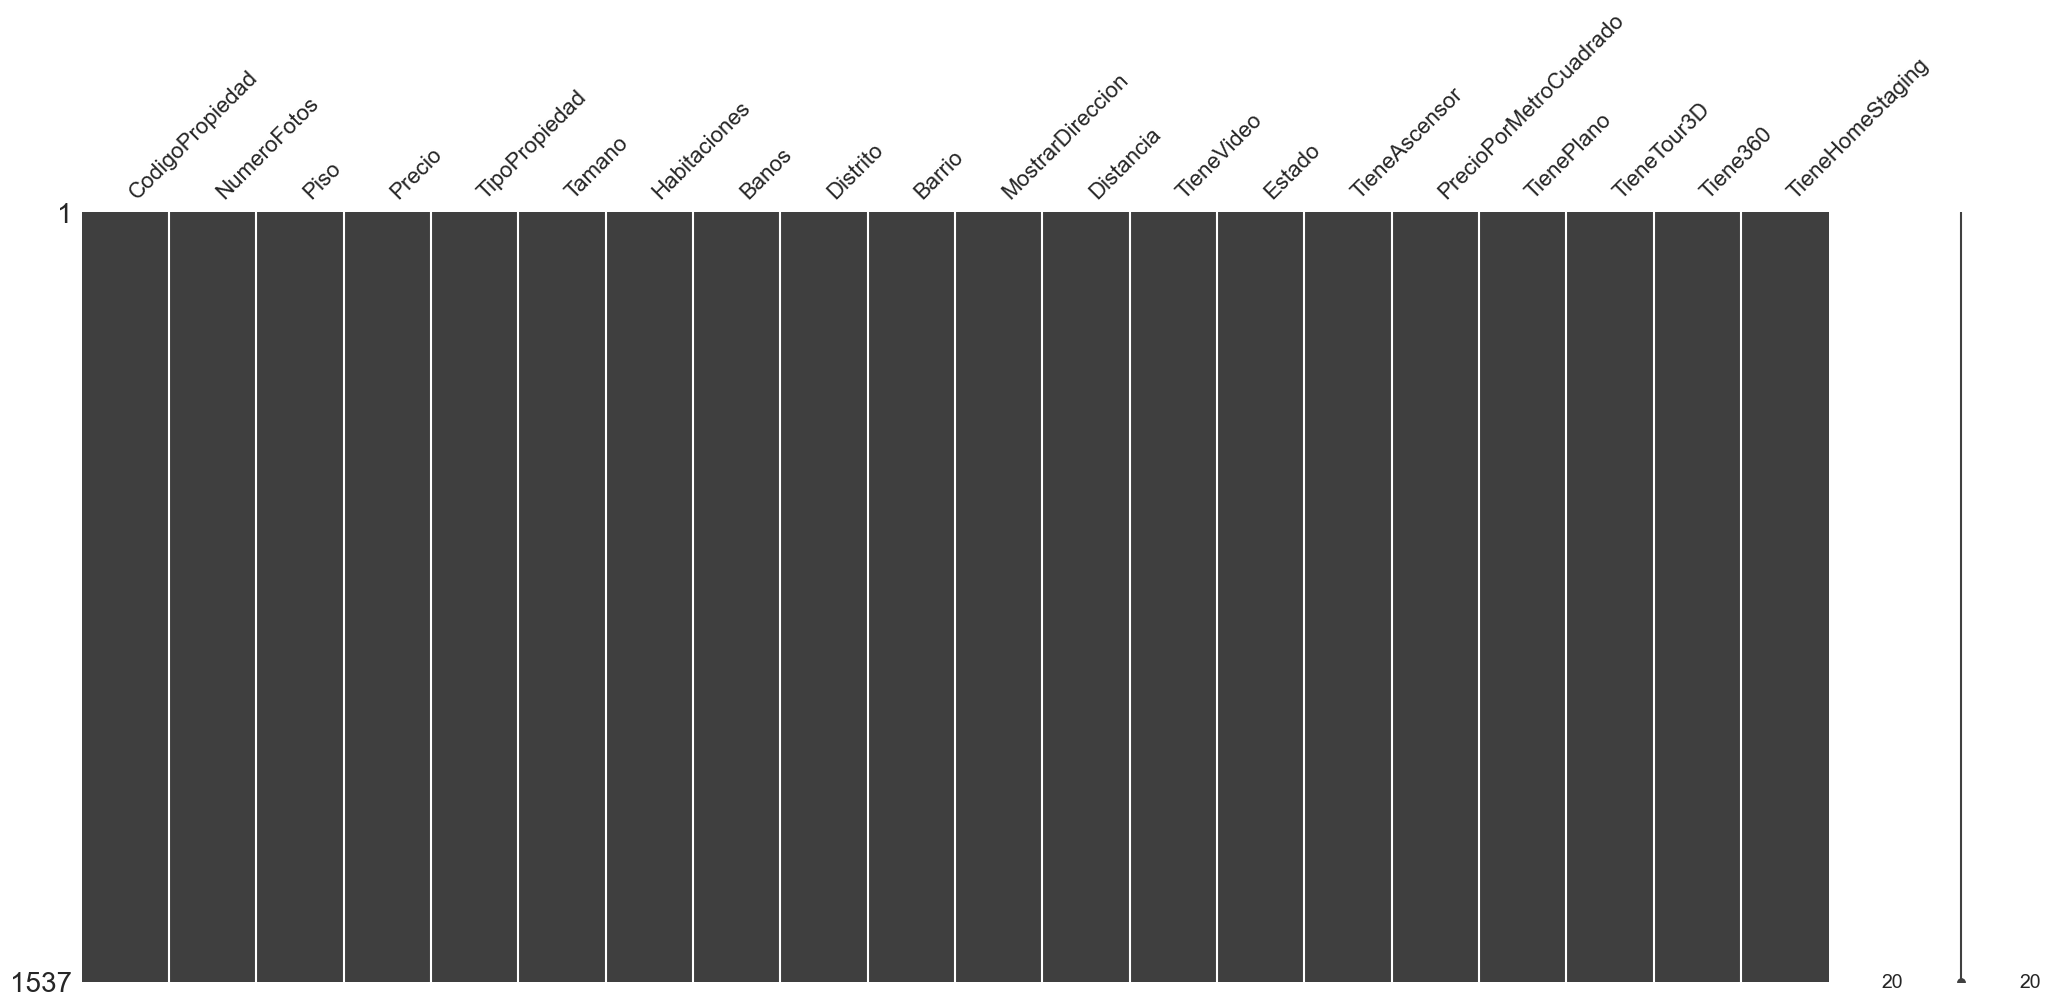

In [6]:
# tratamiendo de valores nulos

# floor
# al observar los datos en el dataset encontramos que los pisos sin datos corresponden a pisos en bajo y le daremos 
# el valor 0, asi tambien reemplazaremos los datos que corresponden a bj como 0

# exterior
# al observar los datos en el dataset encontramos que los datos faltantes corresponden a chalet o casas de campo
# por lo tanto lo cargaremos como TRUE en el dataset

# hasLift
# asumiremos que los pisos que no cuentan con valores en esta variable no cuentan con ascensor

# Rellenar valores nulos en las columnas
df['Piso'].fillna(0, inplace=True)
df['Estado'] = df['Estado'].fillna("good")
df['TieneAscensor'].fillna(False, inplace=True)
df['Distrito'].fillna('No especifica', inplace=True)
df['Barrio'].fillna('No especifica', inplace=True)

# Mostrar el DataFrame resultante para verificar los cambios
msno.matrix(df)

In [7]:
df.shape

(1537, 20)

In [8]:
# Reemplazar valores específicos en la columna 'Piso'
df['Piso'].replace({'bj': 0, 'en': 0, 'ss': 0, 'st': 0}, inplace=True)

# Convertir la columna 'Piso' a tipo numérico
df['Piso'] = pd.to_numeric(df['Piso'], errors='coerce').fillna(0)

# Rellenar valores nulos en otras columnas
df['Piso'].fillna(0, inplace=True)
df['TieneAscensor'].fillna(False, inplace=True)
df['Distrito'].fillna('No especifica', inplace=True)
df['Barrio'].fillna('No especifica', inplace=True)

In [9]:
# al analizar las variables encontramos que los tipos estan mal especificados
df['Piso'] = df['Piso'].astype(int)

In [10]:
import pandas as pd

# Supongamos que df es tu DataFrame y ya está cargado con los datos proporcionados

# Calcula Q1 y Q3
Q1 = df['Precio'].quantile(0.25)
Q3 = df['Precio'].quantile(0.75)

# Calcula el IQR
IQR = Q3 - Q1

# Calcula los límites para identificar valores atípicos
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Filtra los valores atípicos
outliers = df[(df['Precio'] < lower_fence) | (df['Precio'] > upper_fence)]

# Cuenta la cantidad de valores atípicos
cantidad_outliers = len(outliers)

# Muestra la cantidad de valores atípicos
print(f'Cantidad de valores atípicos: {cantidad_outliers}')

# Opcional: Mostrar los valores atípicos
print(outliers)

Cantidad de valores atípicos: 80
      CodigoPropiedad  NumeroFotos  Piso    Precio TipoPropiedad  Tamano  \
9            88869622           80     2  668000.0          flat   260.0   
64          104067268           67     3  665000.0        duplex   246.0   
65          100585057           52     0  680000.0        chalet   249.0   
89           97820761           67     0  690000.0        chalet   239.0   
92          104999937            3     6  730000.0          flat   232.0   
...               ...          ...   ...       ...           ...     ...   
1405         97580573           14     5  599900.0          flat   243.0   
1408        104573564            6     0  748000.0          flat   321.0   
1448        103694500            7     1  698900.0          flat   200.0   
1500        102291100           13     8  748000.0          flat   321.0   
1528        105731560            0     8  598500.0          flat   321.0   

      Habitaciones  Banos         Distrito            

In [11]:
# A fin de que nos afecten menos los valores atípicos a nuestra distribución, 
# cogeremos como 350 € el tope minimo de valor de las propiedades, 
# quitando aquellas que lo superen. A continuación volveremos a ver cómo queda la distribución.

# Filtra el DataFrame para eliminar las filas donde el precio es mayor a 1,500,000
df = df[df['Precio'] <= 598500.0]

# Muestra la cantidad de filas restantes en el DataFrame
cantidad_filas = len(df)
print(f'Cantidad de filas restantes: {cantidad_filas}')

Cantidad de filas restantes: 1483


In [12]:
df

,CodigoPropiedad,NumeroFotos,Piso,Precio,TipoPropiedad,Tamano,Habitaciones,Banos,Distrito,Barrio,MostrarDireccion,Distancia,TieneVideo,Estado,TieneAscensor,PrecioPorMetroCuadrado,TienePlano,TieneTour3D,Tiene360,TieneHomeStaging
0,105157805,67,7,250000.0,flat,113.0,4,2,Universidad San Francisco,Universidad San Francisco,False,2517,True,good,True,2212.0,True,True,False,True
1,105832061,35,3,195000.0,flat,65.0,2,1,Universidad San Francisco,Universidad San Francisco,False,1858,True,good,True,3000.0,True,True,False,False
2,105447275,50,0,220000.0,flat,148.0,4,2,Universidad San Francisco,Universidad San Francisco,False,1833,True,renew,True,1486.0,True,True,False,False
3,104623253,46,2,236000.0,flat,156.0,5,3,Ruiseñores,Ruiseñores,False,2393,True,renew,True,1513.0,True,True,False,False
4,105341044,31,0,160000.0,flat,66.0,2,1,Ruiseñores,Ruiseñores,False,2100,True,good,True,2424.0,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532,104227046,0,2,69000.0,flat,60.0,2,1,Casco Historico,La Magdalena,False,546,False,renew,False,1150.0,False,False,False,False
1533,105357466,0,0,34424.0,flat,56.0,1,1,Las Fuentes,Las Fuentes,False,1818,False,good,False,615.0,False,False,False,False
1534,105357892,0,0,52728.0,flat,61.0,2,1,Delicias,Mercado San Valero,False,1959,False,good,True,864.0,False,False,False,False
1535,105440136,0,0,51783.0,flat,79.0,2,1,Torrero - La Paz,Pinares de Venecia,False,2980,False,good,False,655.0,False,False,False,False


In [13]:
df_transformed = df.copy()

df_transformed = pd.get_dummies(df, columns=['TipoPropiedad', 'Distrito', 'Barrio', 'Estado'])

In [14]:
df_transformed

,CodigoPropiedad,NumeroFotos,Piso,Precio,Tamano,Habitaciones,Banos,MostrarDireccion,Distancia,TieneVideo,...,Barrio_Ranillas,Barrio_Ruiseñores,Barrio_Salvador Allende-Parque Goya-Zorongo,Barrio_San José,Barrio_San José Alto,Barrio_San Pablo,Barrio_Universidad San Francisco,Estado_good,Estado_newdevelopment,Estado_renew
0,105157805,67,7,250000.0,113.0,4,2,False,2517,True,...,False,False,False,False,False,False,True,True,False,False
1,105832061,35,3,195000.0,65.0,2,1,False,1858,True,...,False,False,False,False,False,False,True,True,False,False
2,105447275,50,0,220000.0,148.0,4,2,False,1833,True,...,False,False,False,False,False,False,True,False,False,True
3,104623253,46,2,236000.0,156.0,5,3,False,2393,True,...,False,True,False,False,False,False,False,False,False,True
4,105341044,31,0,160000.0,66.0,2,1,False,2100,True,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532,104227046,0,2,69000.0,60.0,2,1,False,546,False,...,False,False,False,False,False,False,False,False,False,True
1533,105357466,0,0,34424.0,56.0,1,1,False,1818,False,...,False,False,False,False,False,False,False,True,False,False
1534,105357892,0,0,52728.0,61.0,2,1,False,1959,False,...,False,False,False,False,False,False,False,True,False,False
1535,105440136,0,0,51783.0,79.0,2,1,False,2980,False,...,False,False,False,False,False,False,False,True,False,False


In [15]:
# Para una mejor practica realizaremos un cambio de las variables objet y bool a numericas
from sklearn.preprocessing import LabelEncoder

# Crear una copia del DataFrame para no modificar el original
df_transformed1 = df_transformed.copy()

# Convertir columnas booleanas a enteros (True -> 1, False -> 0)
bool_columns = df_transformed1.select_dtypes(include=['bool']).columns
df_transformed1[bool_columns] = df_transformed1[bool_columns].astype(int)

# Convertir columnas de tipo object a números enteros usando LabelEncoder
object_columns = df_transformed1.select_dtypes(include=['object']).columns

# Inicializar LabelEncoder
label_encoders = {}
for col in object_columns:
    le = LabelEncoder()
    df_transformed[col] = le.fit_transform(df_transformed1[col].astype(str))
    label_encoders[col] = le

# Mostrar el DataFrame transformado
print(df_transformed1.head())

# Opcional: Guardar el DataFrame transformado a un nuevo archivo CSV
# df_transformed.to_csv('df_transformed.csv', index=False)

   CodigoPropiedad  NumeroFotos  Piso    Precio  Tamano  Habitaciones  Banos  \
0        105157805           67     7  250000.0   113.0             4      2   
1        105832061           35     3  195000.0    65.0             2      1   
2        105447275           50     0  220000.0   148.0             4      2   
3        104623253           46     2  236000.0   156.0             5      3   
4        105341044           31     0  160000.0    66.0             2      1   

   MostrarDireccion  Distancia  TieneVideo  ...  Barrio_Ranillas  \
0                 0       2517           1  ...                0   
1                 0       1858           1  ...                0   
2                 0       1833           1  ...                0   
3                 0       2393           1  ...                0   
4                 0       2100           1  ...                0   

   Barrio_Ruiseñores  Barrio_Salvador Allende-Parque Goya-Zorongo  \
0                  0                     

In [16]:
# explorar si hay valores unicos

for i in df_transformed1.columns:
    if len(df_transformed1[i].unique())<6:
      print(F'{i}:',len(df_transformed1[i].unique()),'Values:',df_transformed1[i].unique())
    else:
      print(F'{i}:',len(df_transformed1[i].unique()))

CodigoPropiedad: 1438
NumeroFotos: 80
Piso: 19
Precio: 506
Tamano: 195
Habitaciones: 13
Banos: 9
MostrarDireccion: 2 Values: [0 1]
Distancia: 1035
TieneVideo: 2 Values: [1 0]
TieneAscensor: 2 Values: [1 0]
PrecioPorMetroCuadrado: 972
TienePlano: 2 Values: [1 0]
TieneTour3D: 2 Values: [1 0]
Tiene360: 2 Values: [0 1]
TieneHomeStaging: 2 Values: [1 0]
TipoPropiedad_chalet: 2 Values: [0 1]
TipoPropiedad_duplex: 2 Values: [0 1]
TipoPropiedad_flat: 2 Values: [1 0]
TipoPropiedad_penthouse: 2 Values: [0 1]
TipoPropiedad_studio: 2 Values: [0 1]
Distrito_Actur: 2 Values: [0 1]
Distrito_Almozara: 2 Values: [0 1]
Distrito_Arrabal - Barrio Jesus: 2 Values: [0 1]
Distrito_Avda Cataluña-Santa Isabel-Movera: 2 Values: [0 1]
Distrito_Casco Historico: 2 Values: [0 1]
Distrito_Centro: 2 Values: [0 1]
Distrito_Delicias: 2 Values: [0 1]
Distrito_La Jota: 2 Values: [0 1]
Distrito_Las Fuentes: 2 Values: [0 1]
Distrito_Miraflores San Jose: 2 Values: [0 1]
Distrito_Pol Universidad Romareda: 2 Values: [0 1]
Dis

# Modelaje
Ahora definiremos nuestras x e y, que serán necesarias para dar lugar a nuestro modelo. 
Destacar que además,utilizaremos el comando get_dummies para poder registrar los distritos en nuestro modelo de una manera válida.

In [17]:
x, y = df_transformed1.drop(["Precio", "CodigoPropiedad"], axis=1), df_transformed["Precio"]


In [18]:
#Librerias a utilizar

import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import joblib

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor
import scipy as sp
from sklearn.metrics import median_absolute_error

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [19]:
# Ridge Regression

# Generar la lista de columnas
vars_casas = list(df_transformed1.columns)

# Eliminar las columnas especificadas de la lista
vars_casas.remove('Precio')
vars_casas.remove('CodigoPropiedad')


model intercept: -166065.937403


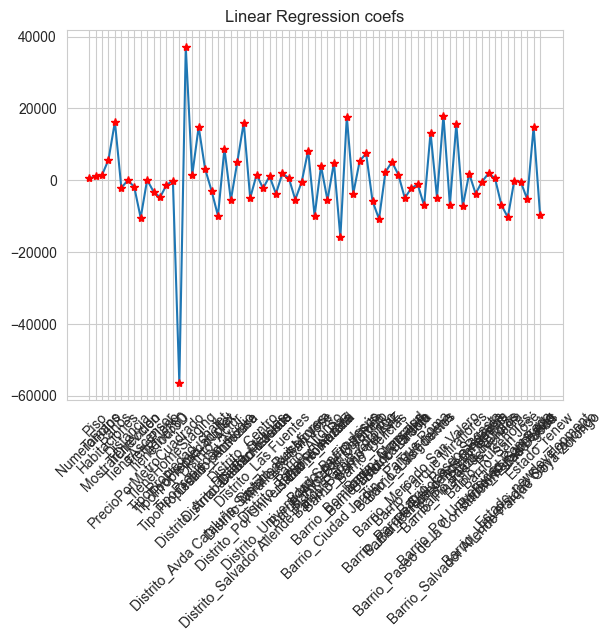

In [20]:
lr_m = Ridge()
#ajuste sobre la muestra completa, sin split train-test
lr_m.fit(x, y)

print ("model intercept: %f" % lr_m.intercept_)

plt.xticks(range(len(vars_casas)), vars_casas, rotation=45)

plt.title( 'Linear Regression coefs')

_ = plt.plot(lr_m.coef_.T, '-', lr_m.coef_. T, 'r*')

MAE: 18888.678	R^2: 0.925


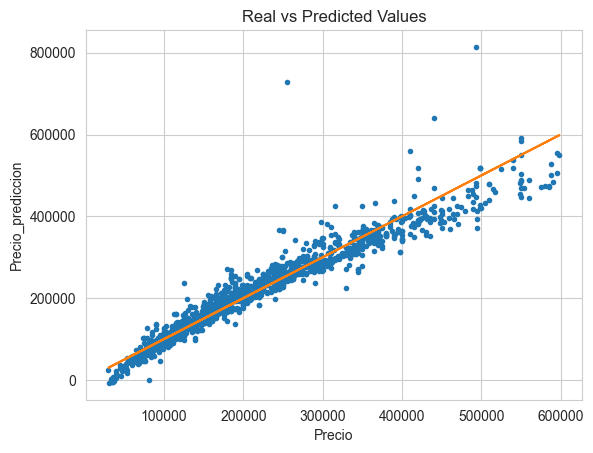

In [21]:
y_pred = lr_m.predict (x)

print ("MAE: %.3f\tR^2: %.3f" % (mean_absolute_error (y, y_pred), lr_m.score(x, y)))
plt.title( 'Real vs Predicted Values')
plt.xlabel ('Precio')
plt.ylabel ('Precio_prediccion')
_ = plt.plot (y, y_pred, '.', y, y, '')

In [22]:
from sklearn import model_selection


In [23]:
n_folds = 10
kf = KFold(n_folds, shuffle=True)

scores = cross_val_score(lr_m, x, y, scoring="neg_mean_absolute_error", cv=kf,n_jobs=-1)

print("mae_mean: %.3f\t\tmae_std: %.3f" % (-scores.mean(), scores.std()))

mae_mean: 20019.095		mae_std: 2165.329


## Fine Tuning

In [24]:
# first iteration to find alpha

# difine folds
n_folds = 10
kf = KFold(n_folds, shuffle=True)

# define param_grid
l_alpha = [2.**k for k in range(-6, 10)]
param_grid = {'alpha': l_alpha}

#define grid_search
lr_m = Ridge()
ridge_alpha_search = GridSearchCV(lr_m,
                                param_grid=param_grid,
                                cv=kf,
                                scoring='neg_mean_absolute_error',
                                n_jobs=-1,
                                verbose=1)

_ = ridge_alpha_search.fit(x,y)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


alpha_range: 0.02 - 512.00
alpha: 32.00 
best_cv_mae: 19569.114


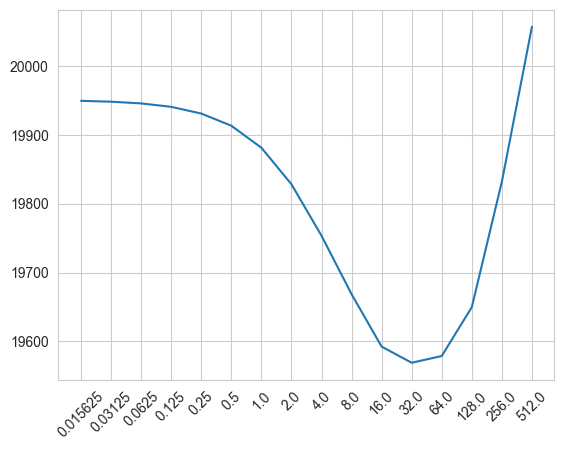

In [25]:
print("alpha_range: %.2f - %.2f" %(np.array(l_alpha).min(), np.array(l_alpha).max()))
print("alpha: %.2f " %(ridge_alpha_search.best_params_['alpha']))
print("best_cv_mae: %.3f" %(-ridge_alpha_search.best_score_))

plt.xticks(range(len(l_alpha)), l_alpha, rotation=45)
_ = plt.plot( -ridge_alpha_search.cv_results_['mean_test_score'])

In [26]:
# segunda iteracion 
kf = KFold(n_folds, shuffle=True)

# define param_grid
l_alpha = [32. * 2.**(k/2) for k in range(-5, 4)]
param_grid = {'alpha': l_alpha}

#define grid_search
lr_m = Ridge()
ridge_alpha_search = GridSearchCV(lr_m,
                                param_grid=param_grid,
                                cv=kf,
                                scoring='neg_mean_absolute_error',
                                n_jobs=-1,
                                verbose=1)

_ = ridge_alpha_search.fit(x,y)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


alpha_range: 5.66 - 90.51
alpha: 45.25 
best_cv_mae: 19580.706


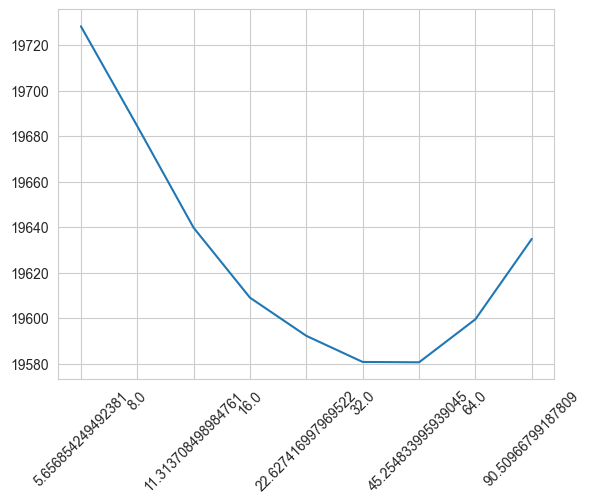

In [27]:
print("alpha_range: %.2f - %.2f" %(np.array(l_alpha).min(), np.array(l_alpha).max()))
print("alpha: %.2f " %(ridge_alpha_search.best_params_['alpha']))
print("best_cv_mae: %.3f" %(-ridge_alpha_search.best_score_))

plt.xticks(range(len(l_alpha)), l_alpha, rotation=45)
_ = plt.plot( -ridge_alpha_search.cv_results_['mean_test_score'])

In [28]:
best_alpha = ridge_alpha_search.best_params_['alpha']
lr_m = Ridge(alpha=best_alpha)

scores = cross_val_score(lr_m, x, y, scoring="neg_mean_absolute_error", cv=kf, n_jobs=2)
print("mean_mean: %.3f\t\tmae_std: %.3f" % (-scores.mean(), scores.std()))

mean_mean: 19712.866		mae_std: 1360.958


In [29]:
y_pred = cross_val_predict(lr_m, x, y)

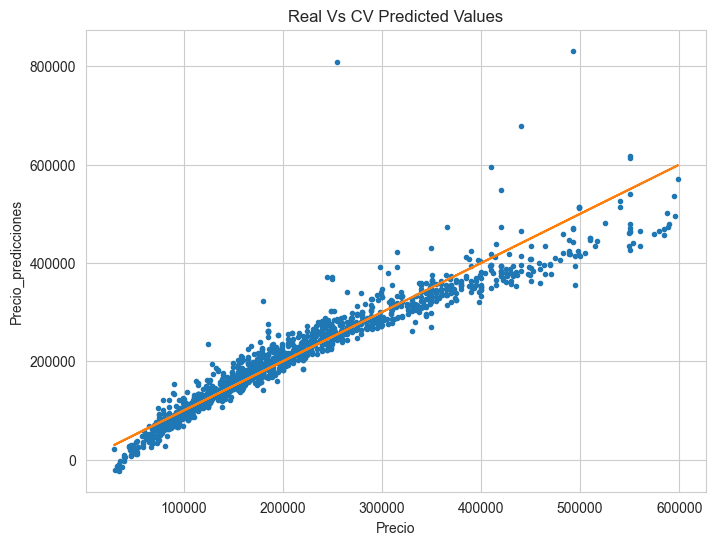

In [30]:
plt.figure( figsize=(8,6))
plt.title( 'Real Vs CV Predicted Values')
plt.xlabel('Precio')
plt.ylabel ('Precio_predicciones')
_ = plt.plot (y, y_pred, '.', y, y, '-')

In [31]:
# Crea un nuevo DataFrame con las columnas deseadas
df_transformed1_pre = df.copy()

# Agrega la columna de predicciones al nuevo DataFrame
df_transformed1_pre['Precio_predicciones'] = y_pred

df_transformed1_pre['Precio_predicciones'] = df_transformed1_pre['Precio_predicciones'].apply(lambda x: f'{x:.2f}')

column_order = list(df_transformed1_pre.columns)  # Obtiene la lista de columnas originales
column_order.remove('Precio')  # Remueve 'precio' para agregarlo después
column_order.append('Precio')  # Agrega 'precio' al final
df_resultados = df_transformed1_pre[column_order]
# Muestra el nuevo DataFrame con las columnas originales y la de predicciones

df_resultados.sample(5)

,CodigoPropiedad,NumeroFotos,Piso,TipoPropiedad,Tamano,Habitaciones,Banos,Distrito,Barrio,MostrarDireccion,...,TieneVideo,Estado,TieneAscensor,PrecioPorMetroCuadrado,TienePlano,TieneTour3D,Tiene360,TieneHomeStaging,Precio_predicciones,Precio
711,105043932,23,3,flat,78.0,2,1,Delicias,Mercado San Valero,False,...,False,good,True,1397.0,True,False,False,False,99897.35,109000.0
52,105005031,53,5,flat,95.0,4,2,Delicias,Ciudad Jardín - Parque Roma,False,...,False,renew,True,2095.0,True,False,False,True,234646.92,199000.0
1276,104181801,16,0,flat,82.0,3,1,Delicias,Barrio del AVE,False,...,True,renew,True,1524.0,False,False,False,False,106821.66,125000.0
1318,98604264,25,3,flat,142.0,4,1,Casco Historico,Alfonso,False,...,False,renew,False,1224.0,False,False,False,False,193071.26,173800.0
1095,105706681,31,3,flat,95.0,3,1,Ruiseñores,Ruiseñores,False,...,False,good,True,2621.0,False,False,False,False,244159.70,249000.0


In [32]:
# Verificamos el tipo de la columna antes de la conversión
print(df_resultados['Precio_predicciones'].dtype)  # Debe ser object

# Convertimos la columna 'Precio_predicciones' a float
df_resultados['Precio_predicciones'] = df_resultados['Precio_predicciones'].astype(float)

# Verificamos el tipo de la columna después de la conversión
print(df_resultados['Precio_predicciones'].dtype)  # Debe ser float

df_resultados.info()

object
float64
<class 'pandas.core.frame.DataFrame'>
Index: 1483 entries, 0 to 1536
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CodigoPropiedad         1483 non-null   int64  
 1   NumeroFotos             1483 non-null   int64  
 2   Piso                    1483 non-null   int32  
 3   TipoPropiedad           1483 non-null   object 
 4   Tamano                  1483 non-null   float64
 5   Habitaciones            1483 non-null   int64  
 6   Banos                   1483 non-null   int64  
 7   Distrito                1483 non-null   object 
 8   Barrio                  1483 non-null   object 
 9   MostrarDireccion        1483 non-null   bool   
 10  Distancia               1483 non-null   int64  
 11  TieneVideo              1483 non-null   bool   
 12  Estado                  1483 non-null   object 
 13  TieneAscensor           1483 non-null   bool   
 14  PrecioPorMetroCuadrado  1483 n

In [33]:
df_resultados[(df_resultados.Precio < 300000) & (df_resultados.Precio < df_resultados.Precio_predicciones)].sort_values

<bound method DataFrame.sort_values of       CodigoPropiedad  NumeroFotos  Piso TipoPropiedad  Tamano  Habitaciones  \
0           105157805           67     7          flat   113.0             4   
1           105832061           35     3          flat    65.0             2   
2           105447275           50     0          flat   148.0             4   
3           104623253           46     2          flat   156.0             5   
4           105341044           31     0          flat    66.0             2   
...               ...          ...   ...           ...     ...           ...   
1504        105381415            9     2          flat    52.0             2   
1507        105616812           20     1          flat   123.0             4   
1511        104440951            9     3          flat   147.0             4   
1522        104713982           20     4          flat   110.0             4   
1527        105785411            0     2          flat   123.0             3   



In [34]:
lr_m.fit(x,y)

Ridge(alpha=45.254833995939045)

In [35]:
pd.DataFrame(lr_m.coef_,
             vars_casas,
            columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
TipoPropiedad_duplex,16894.962558
Banos,15579.569758
Estado_newdevelopment,11028.763224
Distrito_Centro,10379.540977
Barrio_Paseo Independencia,9240.726572
...,...
Barrio_Doctor Cerrada,-4899.268051
Estado_renew,-6946.844509
Distrito_Almozara,-8761.562632
Barrio_Almozara,-8761.562632


## Ahora trataremos de mejorar el modelo usando pipelines

In [36]:
df

,CodigoPropiedad,NumeroFotos,Piso,Precio,TipoPropiedad,Tamano,Habitaciones,Banos,Distrito,Barrio,MostrarDireccion,Distancia,TieneVideo,Estado,TieneAscensor,PrecioPorMetroCuadrado,TienePlano,TieneTour3D,Tiene360,TieneHomeStaging
0,105157805,67,7,250000.0,flat,113.0,4,2,Universidad San Francisco,Universidad San Francisco,False,2517,True,good,True,2212.0,True,True,False,True
1,105832061,35,3,195000.0,flat,65.0,2,1,Universidad San Francisco,Universidad San Francisco,False,1858,True,good,True,3000.0,True,True,False,False
2,105447275,50,0,220000.0,flat,148.0,4,2,Universidad San Francisco,Universidad San Francisco,False,1833,True,renew,True,1486.0,True,True,False,False
3,104623253,46,2,236000.0,flat,156.0,5,3,Ruiseñores,Ruiseñores,False,2393,True,renew,True,1513.0,True,True,False,False
4,105341044,31,0,160000.0,flat,66.0,2,1,Ruiseñores,Ruiseñores,False,2100,True,good,True,2424.0,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532,104227046,0,2,69000.0,flat,60.0,2,1,Casco Historico,La Magdalena,False,546,False,renew,False,1150.0,False,False,False,False
1533,105357466,0,0,34424.0,flat,56.0,1,1,Las Fuentes,Las Fuentes,False,1818,False,good,False,615.0,False,False,False,False
1534,105357892,0,0,52728.0,flat,61.0,2,1,Delicias,Mercado San Valero,False,1959,False,good,True,864.0,False,False,False,False
1535,105440136,0,0,51783.0,flat,79.0,2,1,Torrero - La Paz,Pinares de Venecia,False,2980,False,good,False,655.0,False,False,False,False


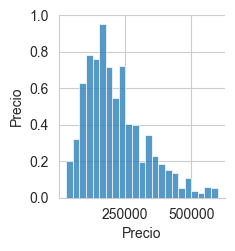

In [37]:
sns.pairplot(df[['Precio']])

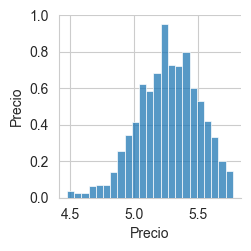

In [38]:
sns.pairplot(np.log10(df[['Precio']]))

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1483 entries, 0 to 1536
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CodigoPropiedad         1483 non-null   int64  
 1   NumeroFotos             1483 non-null   int64  
 2   Piso                    1483 non-null   int32  
 3   Precio                  1483 non-null   float64
 4   TipoPropiedad           1483 non-null   object 
 5   Tamano                  1483 non-null   float64
 6   Habitaciones            1483 non-null   int64  
 7   Banos                   1483 non-null   int64  
 8   Distrito                1483 non-null   object 
 9   Barrio                  1483 non-null   object 
 10  MostrarDireccion        1483 non-null   bool   
 11  Distancia               1483 non-null   int64  
 12  TieneVideo              1483 non-null   bool   
 13  Estado                  1483 non-null   object 
 14  TieneAscensor           1483 non-null   bool 

In [40]:
x, y = df.drop(["Precio", "CodigoPropiedad"], axis=1), df["Precio"]


In [41]:
#Destacar que ya hicimos en unos pasos previos que es x y qué es y. Lo que haremos ahora es crear nuestos TRAIN (70%); TEST (20%) y VALIDATION (10%). Esta última la haremos con el 90% de los datos.
from sklearn.model_selection import train_test_split
# División 70% para entrenamiento
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)

# División 20% para prueba y 10% para validación
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

# Combinar X_train y X_test para obtener el 90% total
X_train_2 = pd.concat([X_train, X_test])

# Combinar y_train y y_test para obtener el 90% total
y_train_2 = pd.concat([y_train, y_test])

In [42]:
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder

#Todo lo siguiente es por si tuvieramos que hacer OneHotEncoder, es decir,
#Estilo variables dummys para categoricas. Como ya lo tenemos resuelto, nos olvidamos

# Columnas categóricas
categorical_columns = [
    'TipoPropiedad', 
    'Distrito', 
    'Barrio', 
    'MostrarDireccion', 
    'TieneVideo', 
    'Estado', 
    'TieneAscensor', 
    'TienePlano', 
    'TieneTour3D', 
    'Tiene360', 
    'TieneHomeStaging'
]

# Columnas numéricas
numerical_columns = [
    'CodigoPropiedad', 
    'NumeroFotos', 
    'Piso', 
    'Precio', 
    'Tamano', 
    'Habitaciones', 
    'Banos', 
    'Distancia', 
    'PrecioPorMetroCuadrado'
]

preprocessor = make_column_transformer(
(OneHotEncoder(drop="if_binary"), categorical_columns),
remainder="passthrough",
verbose_feature_names_out=False,
)

In [43]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor
import scipy as sp

#Ahora aplicaremos el modelaje teniendo en cuenta que "y" vaya con log
model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=Ridge(alpha=1e-10), func=np.log10, inverse_func=sp.special.exp10
    ),
    )

In [44]:
#Con el modelo listo, hacemos fit con los datos de train, es decir, lo entrenamos
model.fit(X_train, y_train)

#Ahora vemos qué tan bien lo hacemos, midiendo accurates, comparando datos de entrenamiento con los de test.
#Lo que haremos será crear datos de predicciones (y) basados en los datos de entrenamiento

y_pred = model.predict(X_train)
mae = median_absolute_error(y_train, y_pred)
string_score = f"MAE on training set: {mae:.2f} euros"

y_pred = model.predict(X_test)
mae = median_absolute_error(y_test, y_pred)
string_score += f"\nMAE on testing set: {mae:.2f} euros"

In [45]:
from sklearn.metrics import median_absolute_error, r2_score

# Para el conjunto de entrenamiento
y_pred_train = model.predict(X_train)
mae_train = median_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
string_score_train = f"MAE on training set: {mae_train:.2f} euros\nR2 on training set: {r2_train:.2f}"

# Para el conjunto de prueba
y_pred_test = model.predict(X_test)
mae_test = median_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
string_score_test = f"MAE on testing set: {mae_test:.2f} euros\nR2 on testing set: {r2_test:.2f}"

# Imprimir o usar string_score_train y string_score_test según lo necesites

In [46]:
string_score_test


'MAE on testing set: 14939.41 euros\nR2 on testing set: 0.82'

Text(0.5, 0, 'Truths')

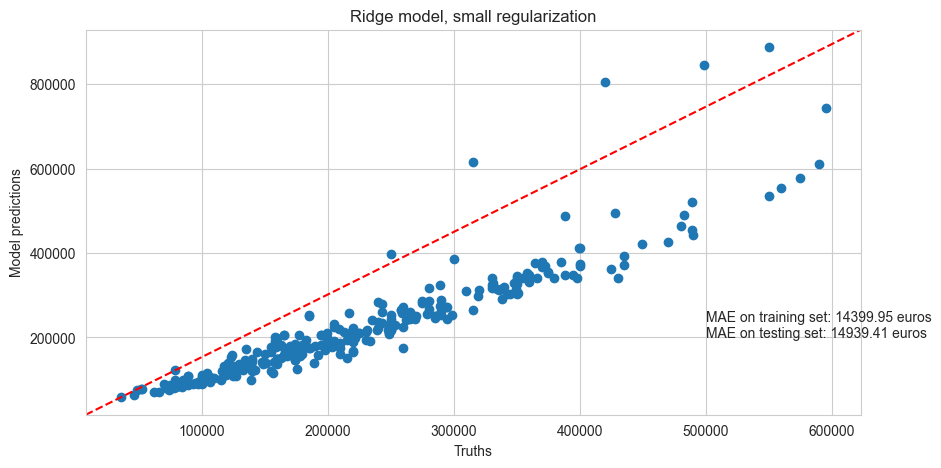

In [47]:
fig, ax = plt.subplots (figsize= (10, 5))
plt.scatter (y_test, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--" , c="red")
plt. text (500000, 200600, string_score)
plt.title ("Ridge model, small regularization")
plt.ylabel ("Model predictions")
plt.xlabel("Truths")

# Prueba de otros modelos
La intención a continuación es aplicar distintos modelos, también en los que se use logaritmos para normalizar la variable Y, y así encontrar el más eficaz.

## Regresión Lineal


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import cross_val_score

# Crear el modelo de regresión lineal
linear_model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=LinearRegression(),
        func=np.log10,
        inverse_func=sp.special.exp10,
    ),
)

# Entrenar el modelo en los datos de entrenamiento
linear_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = linear_model.predict(X_test)

# Calcular el rendimiento del modelo (MAE y R2)
mae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE en el conjunto de prueba: {mae:.2f} euros")
print(f"R2 en el conjunto de prueba: {r2:.2f}")


MAE en el conjunto de prueba: 15191.11 euros
R2 en el conjunto de prueba: 0.87


# Random Forest


In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import cross_val_score

# Crear el modelo de Random Forest
random_forest_model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=RandomForestRegressor(n_estimators=100, random_state=42),
        func=np.log10,
        inverse_func=sp.special.exp10,
    ),
)

# Entrenar el modelo en los datos de entrenamiento
random_forest_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = random_forest_model.predict(X_test)

# Calcular el rendimiento del modelo (por ejemplo, MAE)
mae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE en el conjunto de prueba: {mae:.2f} euros")
print(f"R2 en el conjunto de prueba: {r2:.2f}")

MAE en el conjunto de prueba: 3104.28 euros
R2 en el conjunto de prueba: 0.98


# Forest Normal

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import cross_val_score

# Crear el modelo de Decision Tree
decision_tree_model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=DecisionTreeRegressor(random_state=42),
        func=np.log10,
        inverse_func=sp.special.exp10,
    ),
)

# Entrenar el modelo en los datos de entrenamiento
decision_tree_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = decision_tree_model.predict(X_test)

# Calcular el rendimiento del modelo (MAE y R2)
mae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE en el conjunto de prueba: {mae:.2f} euros")
print(f"R2 en el conjunto de prueba: {r2:.2f}")

MAE en el conjunto de prueba: 5100.00 euros
R2 en el conjunto de prueba: 0.97


# XGBoost

In [51]:
#!pip install xgboost

In [52]:
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import cross_val_score

# Crear el modelo XGBoost
xgboost_model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=XGBRegressor(random_state=42),
        func=np.log10,
        inverse_func=sp.special.exp10,
    ),
)

# Entrenar el modelo en los datos de entrenamiento
xgboost_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = xgboost_model.predict(X_test)

# Calcular el rendimiento del modelo (MAE y R2)
mae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE en el conjunto de prueba: {mae:.2f} euros")
print(f"R2 en el conjunto de prueba: {r2:.2f}")

MAE en el conjunto de prueba: 3771.27 euros
R2 en el conjunto de prueba: 0.99


# C) Predicción FINAL usando Random Forest y Conclusiones

El modelo que escogeremos será el Random Forest, por lo que ahora utilizaremos el 90% de los datos y pasaremos a predecir el 10% en carácter de validación.

In [53]:
#Entrenamiento final usando X_train 2 (90% de datos)


# Entrenar el modelo en los datos de entrenamiento
xgboost_model.fit(X_train_2, y_train_2)

# Realizar predicciones en el conjunto de prueba
y_pred_val = xgboost_model.predict(X_val)

# Calcular el rendimiento del modelo
mae = median_absolute_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)

print(f"MAE en el conjunto de prueba: {mae:.2f} euros")
print(f"R2 en el conjunto de prueba: {r2:.2f}")

MAE en el conjunto de prueba: 3022.01 euros
R2 en el conjunto de prueba: 0.97


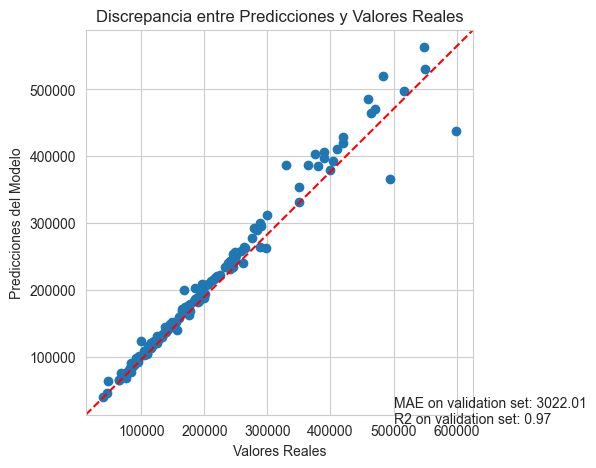

In [54]:
string_score = f"MAE on validation set: {mae:.2f}\nR2 on validation set: {r2:.2f}"

fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(y_val, y_pred_val)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--" , c="red")
plt.text(500000, 200e00, string_score)

plt.title("Discrepancia entre Predicciones y Valores Reales")
plt.ylabel("Predicciones del Modelo")
plt.xlabel("Valores Reales")
plt.show()

In [55]:
#Por medio del siguiente código haremos unas predicciones para
# Obtener las filas del DataFrame original correspondientes al conjunto de validación
df_val_original = df.loc[X_val.index]

# Agregar la columna de predicciones
df_val_original['y_pred_val'] = y_pred_val

# Mostrar las primeras filas del DataFrame resultante
df_val_original.head(10)

,CodigoPropiedad,NumeroFotos,Piso,Precio,TipoPropiedad,Tamano,Habitaciones,Banos,Distrito,Barrio,...,Distancia,TieneVideo,Estado,TieneAscensor,PrecioPorMetroCuadrado,TienePlano,TieneTour3D,Tiene360,TieneHomeStaging,y_pred_val
1200,105786098,20,3,147000.0,flat,73.0,2,1,Arrabal - Barrio Jesus,Barrio Jesús,...,829,False,good,True,2014.0,False,False,False,False,147262.531250
400,105513067,32,3,420000.0,flat,200.0,7,2,Centro,Doctor Cerrada,...,1756,False,good,True,2100.0,True,True,False,False,428512.250000
925,104363466,3,2,80000.0,flat,91.0,5,1,Centro,Paseo Sagasta,...,1600,False,good,True,879.0,True,False,False,False,79792.359375
345,105044142,33,3,92000.0,flat,45.0,1,1,Casco Historico,San Pablo,...,892,True,good,True,2044.0,False,False,False,False,98689.250000
1284,103347772,8,2,184025.0,flat,73.0,2,2,Casco Historico,Plaza de Toros,...,682,False,good,True,2521.0,False,False,False,False,183872.515625
647,105313715,5,2,246000.0,flat,63.0,2,1,Almozara,Almozara,...,1550,False,newdevelopment,True,3905.0,True,False,False,False,247059.078125
1166,101725737,14,3,109000.0,flat,50.0,2,1,Delicias,Parque Delicias - La Bozada,...,2778,False,good,True,2180.0,False,False,False,False,106278.843750
626,104705801,32,5,190000.0,flat,90.0,3,2,Casco Historico,Alfonso,...,221,True,good,True,2111.0,True,True,False,False,189784.062500
1264,105844219,13,0,105000.0,flat,70.0,3,1,Delicias,Barrio del AVE,...,2391,False,good,True,1500.0,False,False,False,False,108358.742188
1289,103239678,12,2,185000.0,flat,89.0,3,1,Centro,Paseo de la Constitución - Las Damas,...,1358,False,good,True,2079.0,False,False,False,False,185674.843750


In [56]:
# Seleccionar solo las columnas de interés
df_val_original = df_val_original[['CodigoPropiedad', 'Precio', 'y_pred_val']]
df_val_original

,CodigoPropiedad,Precio,y_pred_val
1200,105786098,147000.0,147262.531250
400,105513067,420000.0,428512.250000
925,104363466,80000.0,79792.359375
345,105044142,92000.0,98689.250000
1284,103347772,184025.0,183872.515625
...,...,...,...
986,105801349,205000.0,209138.781250
107,105182491,247000.0,242848.781250
1055,105500543,390000.0,405688.250000
450,105913715,265000.0,262447.593750


In [57]:
# Obtener las importancias de las características
feature_importances = random_forest_model.named_steps['transformedtargetregressor'].regressor_.feature_importances_

# Obtener los nombres de las características
feature_names = model.named_steps['columntransformer'].get_feature_names_out()

# Crear un DataFrame con las importancias de las características
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Ordenar el DataFrame por importancia en orden descendente
importances_df = importances_df.sort_values(by='Importance', ascending=False)

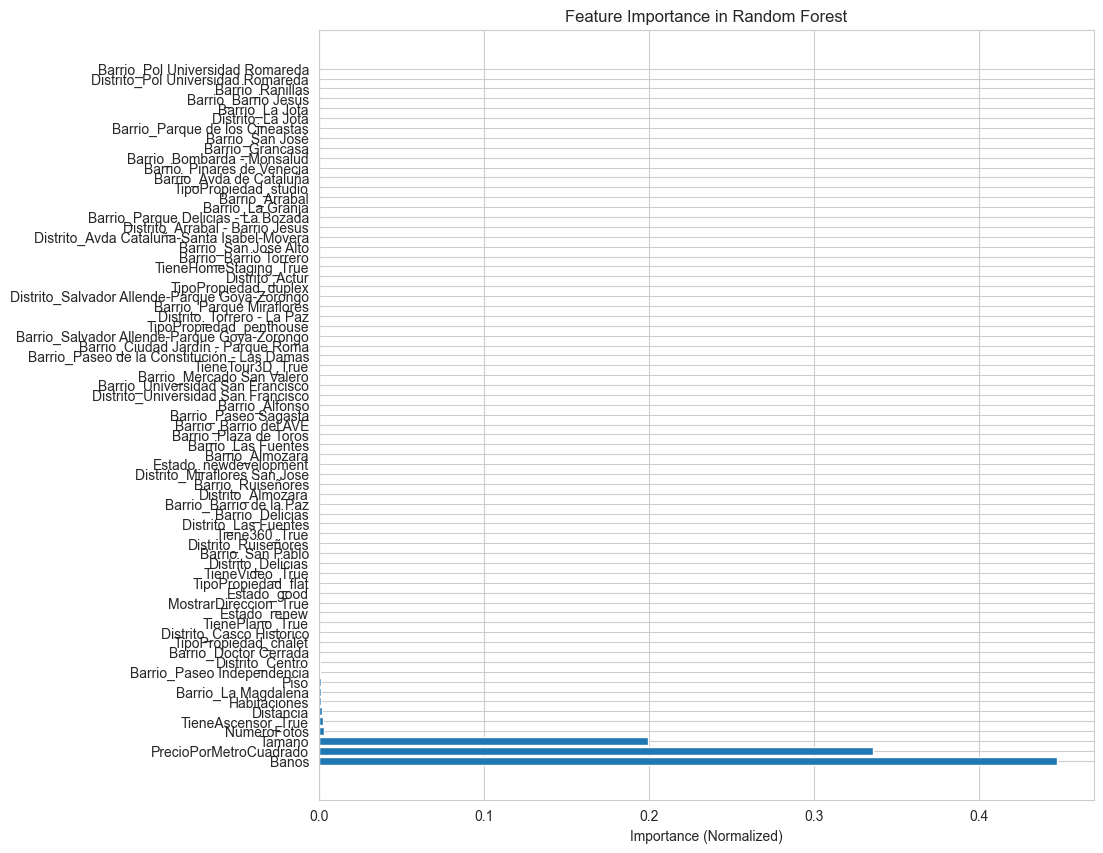

In [58]:
# Crear un DataFrame con las importancias normalizadas de las características
importances_normalized = importances_df.copy()
importances_normalized['Importance'] /= importances_normalized['Importance'].sum()

# Ordenar el DataFrame por importancia en orden descendente
importances_normalized = importances_normalized.sort_values(by='Importance', ascending=False)

# Crear un gráfico de barras
plt.figure(figsize=(10, 10))
plt.barh(importances_normalized['Feature'], importances_normalized['Importance'])
plt.xlabel('Importance (Normalized)')
plt.title('Feature Importance in Random Forest')
plt.show()